ERROR: Line magic function `%watermark` not found.


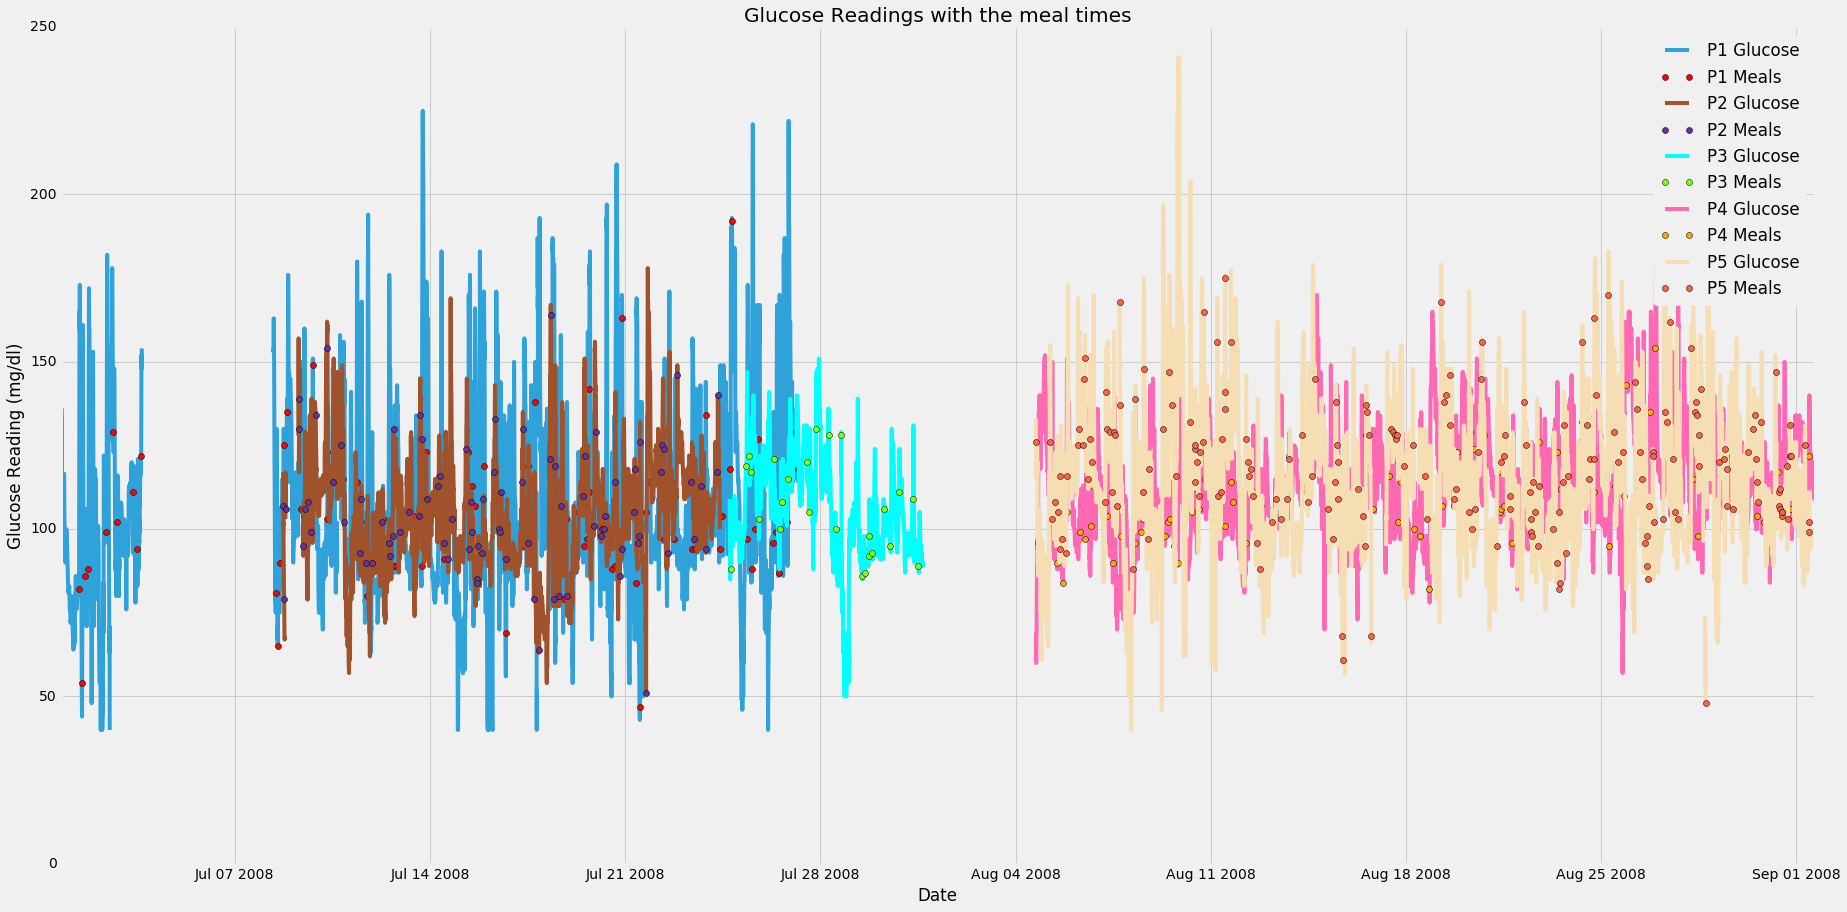

In [124]:
#An IPython magic extension for printing date and time stamps, version numbers, and hardware information. 
#%load_ext watermark 
%watermark -a "Salim Chemlal" -n -t -v 
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, date, time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
#This is graph line style, from Nate silver
plt.style.use('fivethirtyeight')

_DATA_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\Input\input'
_FIG_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\figures'

#####################ALL comments are removed from this file, refer to original one patient code for comments##########

if not os.path.exists(_FIG_DIR):
    os.makedirs(_FIG_DIR)
    
_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P1.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df_P1 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P1 = df_P1.sort(['Date'])

_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P2.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df_P2 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P2 = df_P2.sort(['Date'])

_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P3.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df_P3 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P3 = df_P3.sort(['Date'])

_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P4.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df_P4 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P4 = df_P4.sort(['Date'])

_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P5.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df_P5 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P5 = df_P5.sort(['Date'])

## Matplotlib Variables
_FIG_SIZE = (28, 14)
_FIG_FORMAT = 'png'
_FIG_DPI = 200

def _file_format(string_):
    string_ = string_.replace('-', '_').replace(' ', '_').replace('$', '')
    string_ += '.' + _FIG_FORMAT
    return string_

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

df_P1_wonan_mg = df_P1.dropna(subset=['mg/dL'])
df_P2_wonan_mg = df_P2.dropna(subset=['mg/dL'])
df_P3_wonan_mg = df_P3.dropna(subset=['mg/dL'])
df_P4_wonan_mg = df_P4.dropna(subset=['mg/dL'])
df_P5_wonan_mg = df_P5.dropna(subset=['mg/dL'])
###################
df_P12= pd.DataFrame(df_P1).convert_objects(convert_numeric=True)
df_P22= pd.DataFrame(df_P2).convert_objects(convert_numeric=True)
df_P32= pd.DataFrame(df_P3).convert_objects(convert_numeric=True)
df_P42= pd.DataFrame(df_P4).convert_objects(convert_numeric=True)
df_P52= pd.DataFrame(df_P5).convert_objects(convert_numeric=True)

df_P12 = df_P12.dropna(subset=['CHO (g)'])
df_P22 = df_P22.dropna(subset=['CHO (g)'])
df_P32 = df_P32.dropna(subset=['CHO (g)'])
df_P42 = df_P42.dropna(subset=['CHO (g)'])
df_P52 = df_P52.dropna(subset=['CHO (g)'])

df_P12_wonan_mg = df_P12.dropna(subset=['mg/dL'])
df_P22_wonan_mg = df_P22.dropna(subset=['mg/dL'])
df_P32_wonan_mg = df_P32.dropna(subset=['mg/dL'])
df_P42_wonan_mg = df_P42.dropna(subset=['mg/dL'])
df_P52_wonan_mg = df_P52.dropna(subset=['mg/dL'])

########################
#resetting dataframe index
df_P13 = df_P12_wonan_mg.reset_index(drop=True)
df_P23 = df_P22_wonan_mg.reset_index(drop=True)
df_P33 = df_P32_wonan_mg.reset_index(drop=True)
df_P43 = df_P42_wonan_mg.reset_index(drop=True)
df_P53 = df_P52_wonan_mg.reset_index(drop=True)

df_P14 = pd.DataFrame(df_P13)
df_P24 = pd.DataFrame(df_P23) 
df_P34 = pd.DataFrame(df_P33)
df_P44 = pd.DataFrame(df_P43) 
df_P54 = pd.DataFrame(df_P53) 

row = 0
for i, x in enumerate(df_P13['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df_P13['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df_P14.drop(df_P14.index[row], axis=0, inplace=True)
                row = row - 1

row = 0
for i, x in enumerate(df_P23['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df_P23['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df_P24.drop(df_P24.index[row], axis=0, inplace=True)
                row = row - 1

row = 0
for i, x in enumerate(df_P33['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df_P33['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df_P34.drop(df_P34.index[row], axis=0, inplace=True)
                row = row - 1
                
row = 0
for i, x in enumerate(df_P43['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df_P43['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df_P44.drop(df_P44.index[row], axis=0, inplace=True)
                row = row - 1
                
row = 0
for i, x in enumerate(df_P53['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df_P53['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df_P54.drop(df_P54.index[row], axis=0, inplace=True)
                row = row - 1

df_P14 = df_P14.reset_index(drop=True)
df_P24 = df_P24.reset_index(drop=True)
df_P34 = df_P34.reset_index(drop=True)
df_P44 = df_P44.reset_index(drop=True)
df_P54 = df_P54.reset_index(drop=True)

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df_P1.Date, df_P1['mg/dL'], '-', label="P1 Glucose");
plt.plot_date(df_P14.Date, df_P14['mg/dL'], 'ro', label="P1 Meals")

plt.plot_date(df_P2.Date, df_P2['mg/dL'], '-', color='#A0522D', label="P2 Glucose");
plt.plot_date(df_P24.Date, df_P24['mg/dL'], 'ro', color='#663399', label="P2 Meals")

plt.plot_date(df_P3.Date, df_P3['mg/dL'], '-', color='#00FFFF', label="P3 Glucose");
plt.plot_date(df_P34.Date, df_P34['mg/dL'], 'ro', color='#7FFF00', label="P3 Meals")

plt.plot_date(df_P4.Date, df_P4['mg/dL'], '-', color='#FF69B4', label="P4 Glucose");
plt.plot_date(df_P44.Date, df_P44['mg/dL'], 'ro', color='#FFA500', label="P4 Meals")

plt.plot_date(df_P5.Date, df_P5['mg/dL'], '-', color='#F5DEB3', label="P5 Glucose");
plt.plot_date(df_P54.Date, df_P54['mg/dL'], 'ro', color='#FF6347', label="P5 Meals")

plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Glucose Readings with the meal times'
plt.title(title);
#change title to include date of first index and last index
#title = 'Glucose readings for P1 between {} - 2008-07-27'.format(_BEGINNING_DATE)
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.savefig(fig_path, dpi=_FIG_DPI)


In [125]:
#This cell is for the interactive plotting using bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models.markers import Asterisk
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid
from bokeh.models import HoverTool

# output to static HTML file
output_file("lines.html")

plot = figure(plot_width=1850, plot_height=900, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

s_P1 = plot.line(df_P1.Date, df_P1['mg/dL'],  line_width=2, line_alpha=0.6, legend="P1 Glucose")
s_P2 = plot.line(df_P2.Date, df_P2['mg/dL'],  line_width=2, color='crimson', line_alpha=0.6, legend="P2 Glucose")
s_P3 = plot.line(df_P3.Date, df_P3['mg/dL'],  line_width=2, color='#FFA500', line_alpha=0.6, legend="P3 Glucose")
s_P4 = plot.line(df_P4.Date, df_P4['mg/dL'],  line_width=2, color='#A0522D', line_alpha=0.6, legend="P4 Glucose")
s_P5 = plot.line(df_P5.Date, df_P5['mg/dL'],  line_width=2, color='#9370DB', line_alpha=0.6, legend="P5 Glucose")

source = ColumnDataSource(dict(x=df_P14.Date, y=df_P14['mg/dL'], z=df_P14['CHO (g)']))

glyph_1 = Asterisk(x="x", y="y", line_color="#f0027f", fill_color=None, line_width=8)
s_P1_glyph = plot.add_glyph(source, glyph_1)

plot.add_tools(HoverTool(renderers=[s_P1_glyph], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('Meal Size (grams)', '@z')
]))

source = ColumnDataSource(dict(x=df_P24.Date, y=df_P24['mg/dL'], z=df_P24['CHO (g)']))

glyph_1 = Asterisk(x="x", y="y", line_color="#6B8E23", fill_color=None, line_width=8)
s_P2_glyph = plot.add_glyph(source, glyph_1)

plot.add_tools(HoverTool(renderers=[s_P2_glyph], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('Meal Size (grams)', '@z')
]))

source = ColumnDataSource(dict(x=df_P34.Date, y=df_P34['mg/dL'], z=df_P34['CHO (g)']))

glyph_1 = Asterisk(x="x", y="y", line_color="#000080", fill_color=None, line_width=8)
s_P3_glyph = plot.add_glyph(source, glyph_1)

plot.add_tools(HoverTool(renderers=[s_P3_glyph], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('Meal Size (grams)', '@z')
]))


source = ColumnDataSource(dict(x=df_P44.Date, y=df_P44['mg/dL'], z=df_P44['CHO (g)']))

glyph_1 = Asterisk(x="x", y="y", line_color="#ADFF2F", fill_color=None, line_width=8)
s_P4_glyph = plot.add_glyph(source, glyph_1)

plot.add_tools(HoverTool(renderers=[s_P4_glyph], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('Meal Size (grams)', '@z')
]))

source = ColumnDataSource(dict(x=df_P54.Date, y=df_P54['mg/dL'], z=df_P54['CHO (g)']))

glyph_1 = Asterisk(x="x", y="y", line_color="#DC143C", fill_color=None, line_width=8)
s_P5_glyph = plot.add_glyph(source, glyph_1)

plot.add_tools(HoverTool(renderers=[s_P5_glyph], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('Meal Size (grams)', '@z')
]))


# show the results
show(plot)

If we would like all patients in one histogram plot -- Not best representation

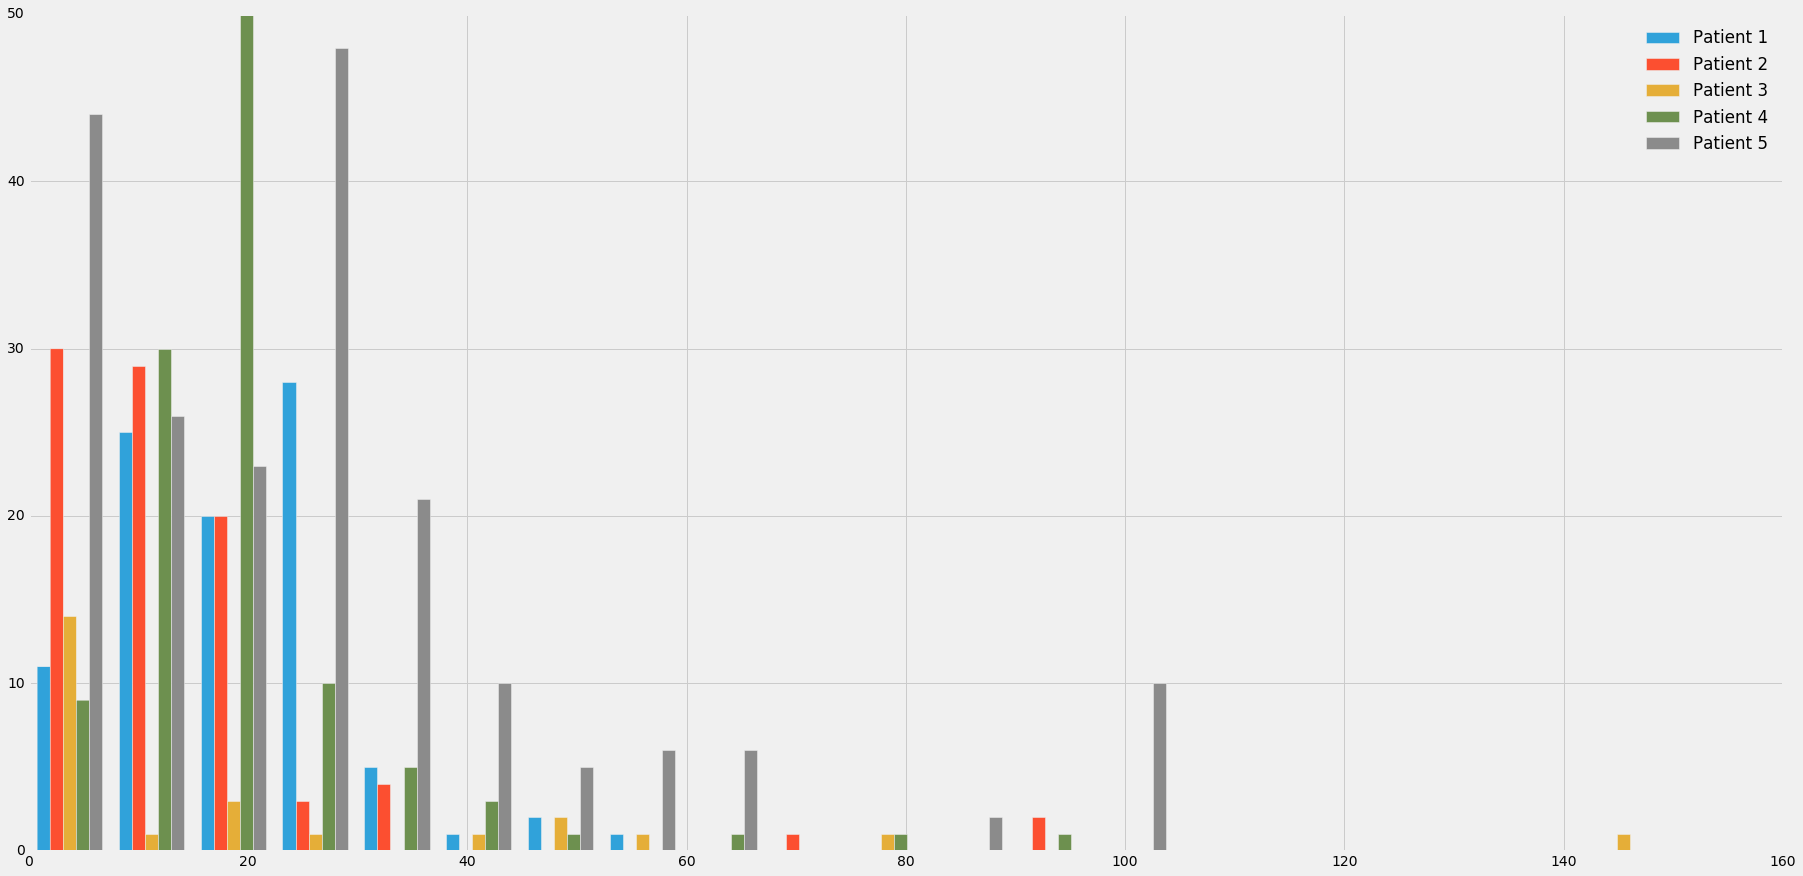

In [126]:
plt.figure(figsize=_FIG_SIZE)
n, bins, patches = plt.hist([df_P14['CHO (g)'], df_P24['CHO (g)'],df_P34['CHO (g)'],df_P44['CHO (g)'],df_P54['CHO (g)']], 
                            20, alpha=1, label=['Patient 1','Patient 2','Patient 3','Patient 4','Patient 5'])
plt.legend()

A better representation is all patients histograms next to each others as subplots

(array([ 25.,  18.,  15.,   6.,  15.,  12.,  10.,  27.,  24.,   8.,   2.,
          3.,   7.,   2.,   3.,   4.,   0.,   2.,   6.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   8.,   2.]),
 array([   0.        ,    3.44483333,    6.88966667,   10.3345    ,
          13.77933333,   17.22416667,   20.669     ,   24.11383333,
          27.55866667,   31.0035    ,   34.44833333,   37.89316667,
          41.338     ,   44.78283333,   48.22766667,   51.6725    ,
          55.11733333,   58.56216667,   62.007     ,   65.45183333,
          68.89666667,   72.3415    ,   75.78633333,   79.23116667,
          82.676     ,   86.12083333,   89.56566667,   93.0105    ,
          96.45533333,   99.90016667,  103.345     ]),
 <a list of 30 Patch objects>)

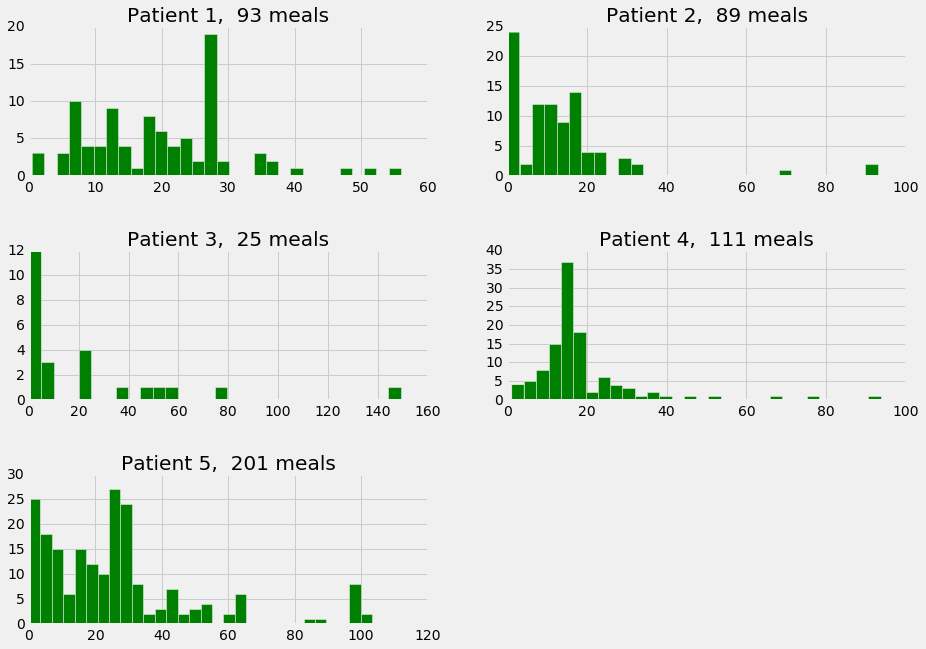

In [142]:
fig = plt.figure(figsize= (14,10))

plt.subplots_adjust(hspace=0.5)
sub1 = fig.add_subplot(321)
sub1.set_title('Patient 1,  {} meals'.format(df_P14['CHO (g)'].size))
plt.hist(df_P14['CHO (g)'], 30, facecolor='green', alpha=1)
sub2 = fig.add_subplot(322)
sub2.set_title('Patient 2,  {} meals'.format(df_P24['CHO (g)'].size))
plt.hist(df_P24['CHO (g)'], 30, facecolor='green', alpha=1)
sub3 = fig.add_subplot(323)
sub3.set_title('Patient 3,  {} meals'.format(df_P34['CHO (g)'].size))
plt.hist(df_P34['CHO (g)'], 30, facecolor='green', alpha=1)
sub4 = fig.add_subplot(324)
sub4.set_title('Patient 4,  {} meals'.format(df_P44['CHO (g)'].size))
plt.hist(df_P44['CHO (g)'], 30, facecolor='green', alpha=1)
sub5 = fig.add_subplot(325)
sub5.set_title('Patient 5,  {} meals'.format(df_P54['CHO (g)'].size))
plt.hist(df_P54['CHO (g)'], 30, facecolor='green', alpha=1)